In [1]:
import numpy as np
import math
import random
import os
import time
import pandas as pd
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

from tqdm import tqdm

In [2]:
path = '/Users/giuliamariaborro/Dropbox/@transitoCeci/MASTER/Galaxies_and_Dynamics/treecode/'

# Plummer sphere, Initial positions

The Plummer sphere has a denisty profile
$$ \rho \left( R \right) = \frac{3 M_{tot}}{4\pi b^3}  \frac{1}{\left[1 + \left(\frac{r^2}{b^2}\right)\right]^{5/2}}$$ 
Inverting the relation for $M \left(R \right)/M_{tot}$ we obtain that 
$$
\begin{cases}
    R = b \sqrt{\left( \frac{ \xi^{2/3}}{1-\xi^{2/3}}\right)} && 0 \le \xi \le 1 \\ \\
    \varphi = \tilde{\varphi} && 0 \le \tilde{\varphi} \le 2 \pi \\ \\
    \theta = \arccos(1-2 \omega) &&  0 \le \omega \le 1 
\end{cases}
$$

In [3]:
M = 1
N = 10**4
b = 1
m = M/N
G = 1

In [4]:
np.random.seed(42)

r_cdf = np.random.uniform(0,1,N)
R = b * np.sqrt(r_cdf**(2/3)/(1- r_cdf**(2/3)))
theta_cdf = np.random.uniform(0,1,N)
theta = np.arccos(1 - 2 * theta_cdf)
phi = np.random.uniform(0, 2 * np.pi, size=N) 

In [5]:
x = R * np.cos(phi) * np.sin(theta)
y = R * np.sin(phi) * np.sin(theta)
z = R * np.cos(theta)

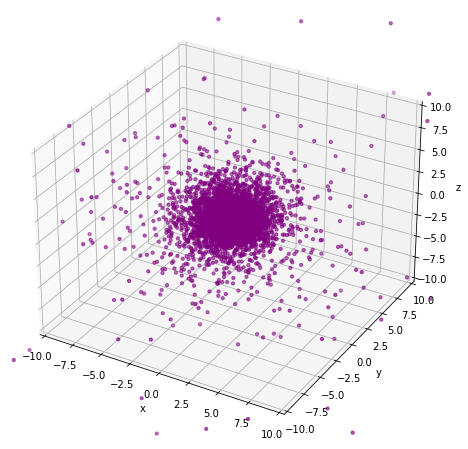

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
ax.scatter(x, y, z, c = 'purple', s=10.5)
#ax.scatter(xp, yp, zp, c='black', s=10.5)
ax.set_aspect('auto')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show();

In [7]:
'''

#calcolo raggi
R = np.sort(R)
sampl = 1000
alpha = b/100
p_error = []
X     = np.linspace(b*0.01, 3 * b, sampl)
#rho_t = []
#for i in range(len(r_t)):
rho_plummer = []
#    tmp_err = []
for x in X:
    dr      = alpha * x 
    r_min   = (x - dr/2)
    r_max   = (x + dr/2) 
    V_shell = 4 * np.pi * dr * x**2 #Calcolo i volume della shell
    mask    = (R > r_min) * (R < r_max) # prendo i raggi compresi tra r_min e r_max
    #print(r_max)
    #print(np.where(mask == True))
    n       = len(R[mask])
    rho_plummer.append(n * m / V_shell) #len(r_t[i][mask] è il numero di particelle dentro la shell
    #tmp_err.append(np.sqrt(n)*m/V_shell)
    #rho_t.append(rho)
    #p_error.append(tmp_err)

#p_error = np.array(p_error)
#tmp_err = np.array(tmp_err)
#rho_t = np.array(rho_t) # densità a diversi tempi
rho_plummer = np.array(rho_plummer) #denisità a tempo = T_sim
rho_th = 3* M /(4*np.pi*b**3) * 1/(1+(X**2/b**2))**(5/2)
rho_c = 3* M /(4*np.pi*b**3) #densità centrale
'''

'\n\n#calcolo raggi\nR = np.sort(R)\nsampl = 1000\nalpha = b/100\np_error = []\nX     = np.linspace(b*0.01, 3 * b, sampl)\n#rho_t = []\n#for i in range(len(r_t)):\nrho_plummer = []\n#    tmp_err = []\nfor x in X:\n    dr      = alpha * x \n    r_min   = (x - dr/2)\n    r_max   = (x + dr/2) \n    V_shell = 4 * np.pi * dr * x**2 #Calcolo i volume della shell\n    mask    = (R > r_min) * (R < r_max) # prendo i raggi compresi tra r_min e r_max\n    #print(r_max)\n    #print(np.where(mask == True))\n    n       = len(R[mask])\n    rho_plummer.append(n * m / V_shell) #len(r_t[i][mask] è il numero di particelle dentro la shell\n    #tmp_err.append(np.sqrt(n)*m/V_shell)\n    #rho_t.append(rho)\n    #p_error.append(tmp_err)\n\n#p_error = np.array(p_error)\n#tmp_err = np.array(tmp_err)\n#rho_t = np.array(rho_t) # densità a diversi tempi\nrho_plummer = np.array(rho_plummer) #denisità a tempo = T_sim\nrho_th = 3* M /(4*np.pi*b**3) * 1/(1+(X**2/b**2))**(5/2)\nrho_c = 3* M /(4*np.pi*b**3) #densità c

In [8]:
'''
plt.scatter(X, rho_plummer, s=0.5, label='unperturbed')
plt.semilogy()'''

"\nplt.scatter(X, rho_plummer, s=0.5, label='unperturbed')\nplt.semilogy()"

In [9]:
'''
#plot della singola misura a T = T_sim. Normalizzo alla densità centrale 
t=len(rho_t)-1

plt.scatter(X,rho/r, s=0.5)
#plt.plot(X,rho_th/rho_c, c='red') 
#plt.fill_between(X, rho_th/rho_c - p_error[t]/rho_c, rho_th/rho_c + p_error[t]/rho_c, alpha= 0.3)
plt.yscale('log')
plt.ylabel('\u03C1/ \u03C1$_{c}$')
plt.xlabel('r/b')
plt.savefig('density_profile_t='+str(t)+'.eps', format='eps' )
'''

"\n#plot della singola misura a T = T_sim. Normalizzo alla densità centrale \nt=len(rho_t)-1\n\nplt.scatter(X,rho/r, s=0.5)\n#plt.plot(X,rho_th/rho_c, c='red') \n#plt.fill_between(X, rho_th/rho_c - p_error[t]/rho_c, rho_th/rho_c + p_error[t]/rho_c, alpha= 0.3)\nplt.yscale('log')\nplt.ylabel('ρ/ ρ$_{c}$')\nplt.xlabel('r/b')\nplt.savefig('density_profile_t='+str(t)+'.eps', format='eps' )\n"

# Initial velocities
The velocity distribution is isotropic. For bound orbits $\vert \vec{v} \vert = q \sqrt{\Psi}$, where  $\Psi\left(\vec{x}\right) = -\phi\left(\vec{x}\right)$ and  $q$ is a position indipendent random number distribiuted with 
$$
 f(q) = A q^2 \left(1-q^2\right)
$$
- Compute the normalization constant
- sample q with the Montecarlo rejection method
- Compute the magnitude of the velocities.  $\vert \vec{v} \vert = q \sqrt{\Psi}$
Since the distribution is isotropic, it should form a sphere in velocity space.



$$
\begin{cases}
   \vert \vec{v} \vert = q \sqrt{\Psi} &&  0 \le q \le 1  && \text{with $f(q)$} \\ \\
    v_{\varphi} = \tilde{\varphi} && 0 \le \tilde{\varphi} \le 2 \pi \\ \\
    v_{\theta} = \arccos(1-2 \omega) &&  0 \le \omega \le 1 
\end{cases}
$$


To switch to Cartesian coordinates, I use the following change of coordinates.

$$
\begin{cases}
   v_{x} = \vert \vec{v} \vert \cos(v_{\varphi}) \sin(v_{\theta}) \\
   v_{y} = \vert \vec{v} \vert \sin(v_{\varphi}) \sin(v_{\theta}) \\
   v_{z} = \vert \vec{v} \vert  \cos(v_{\theta})
\end{cases}
$$

In [10]:
Psi = G * M /(R**2 + b**2)**(1/2)

In [11]:
pdf_test = lambda x: (x**2*(1-x**2)**(3.5))
A = integrate.quad(pdf_test,0,1)
q = np.linspace(0,1,100000)
pdf = 1/A[0]*(q**2*(1-q**2)**(3.5))
pdf_func = lambda x: 1/A[0]*(x**2*(1-x**2)**(3.5))
g = np.ones(100000)*np.max(pdf)

In [12]:
pdf_test = lambda x: (x**2*(1-x**2)**(3.5))
A = integrate.quad(pdf_test,0,1)
q = np.linspace(0,1,100000)
pdf = 1/A[0]*(q**2*(1-q**2)**(3.5))
pdf_func = lambda x: 1/A[0]*(x**2*(1-x**2)**(3.5))
g = np.ones(100000)*np.max(pdf)

In [13]:
q_sample = []

for i in range(N):
    y_rand = np.max(g) + 1
    rand = np.random.uniform(0,1)
    while y_rand > pdf_func(rand):
        rand = np.random.uniform(0,1)
        y_rand = np.random.uniform(0,np.max(g))

    q_sample.append(rand)

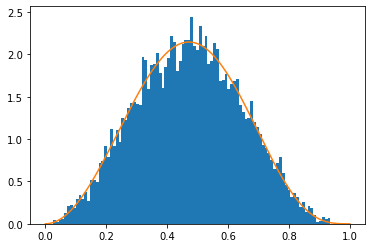

In [14]:
q_sample = np.array(q_sample)
plt.hist(q_sample,100, density=True)
plt.plot(q,pdf);

In [15]:
v = q_sample * np.sqrt(2 * Psi)
v_theta_cdf = np.random.uniform(0,1,N)
v_theta = np.arccos(1 - 2 * v_theta_cdf)
v_phi = np.random.uniform(0, 2 * np.pi, size=N) 

In [16]:
v_x = v * np.cos(v_phi) * np.sin(v_theta)
v_y = v * np.sin(v_phi) * np.sin(v_theta)
v_z = v * np.cos(v_theta)

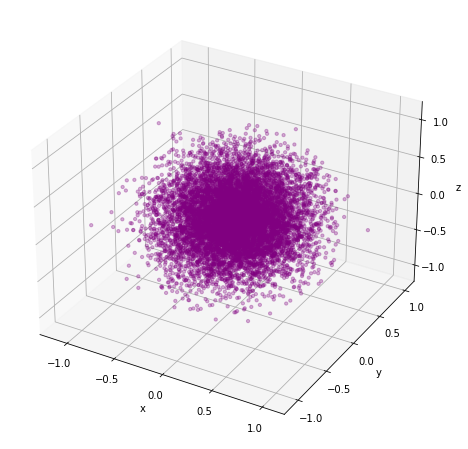

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

#ax.set_xlim(-1,1)
#ax.set_ylim(-1,1)
#ax.set_zlim(-1,1)
ax.scatter(v_x, v_y, v_z, c = 'purple', s=10.5, alpha = 0.3, zorder=1)
#ax.scatter(v_xp, v_yp, v_zp, c = 'black', s=10.5, zorder=0)
ax.set_aspect('auto')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show();

### Perturber

Masses used: 0.005, 0.01, 0.1

Initial position: 

In [22]:
# mp used: 0.001*5, 0.01, 0.1
mp = 0.005

In [23]:
# Perturber position out of the plummer sphere, only on x axis
xp = b*0.65
yp = 0
zp = 0

In [24]:
# PERTURBER VELOCITIES

'''# we use keplerian velocity. The central mass is the mass within the volume inside xp
mask = R<xp
n1 = len(R[R<xp])       # number of particles with R<xp
m_xp = np.sum(m*n1)  # mass wihtin r<xp
v_zp = (m_xp/xp)**0.5    # only radial velocity. 
'''

v_xp= 0
v_yp = 0
v_zp2 = G*M*xp**2/((xp**2+b**2)**(3/2))  # circular velocity**2 for Plummer sphere
v_zp = (v_zp2)**0.5

In [25]:
#LC = np.log(1+(xp * v_zp**2/(M + mp))**2)   #coulomb log
T_dynamical = 1.17* xp**2 * v_zp / (mp)
print(T_dynamical)

49.33631644840355


###### input file

In [22]:
# creating the input file
m_arr = m * np.ones(N)
dim = 3


with open ('in_data.txt', 'w+') as f:
    f.write(str(N+1) + '\n')
    f.write(f'{dim}' + '\n')
    f.write('0' + '\n')
    for m_i in m_arr:
        f.write(f'{m_i}' + '\n')
    f.write(f'{mp}' + '\n')
    for i in range(N):
        f.write(f'{x[i]} {y[i]} {z[i]}' + '\n')
    f.write(f'{xp} {yp} {zp}' + '\n')
    for j in range(N):
        f.write(f'{v_x[j]} {v_y[j]} {v_z[j]}' + '\n')
    f.write(f'{v_xp} {v_yp} {v_zp}' + '\n')

In [31]:
T_sim = 100   
'''it corresponds to 2*tydamical for mp = 0.005, 4*tydamical for mp = 0.01 40*tynamical for mp=0.1'''
dt = 1/16
theta = 0.2
t_out = 5*dt

In [32]:
import os
open('out_data.txt', 'w').close()
os.system(path+'./treecode in=in_data.txt dtime='+ str(dt) + ' theta='+str(theta)+ ' tstop='+str(T_sim) +' dtout='+str(t_out)+' out=out_data.txt >log.txt')
#os.system(path+'./treecode in=in_data.txt out=output.txt dtime='+str(dt)+' eps='+str(epsilon)+' theta='+str(theta)+' tstop='+str(T_sim)+ ' > log.txt')

0

In [ ]:
# simulation
from matplotlib import animation
from tqdm import tqdm

def update(num):
    global N    #N_particles
    l = 5
    ax.clear()
    
    ax.scatter(x_s[:-1,num-1], y_s[:-1,num-1], z_s[:-1,num-1], color = 'royalblue', s = 2.5 ,alpha = .3, zorder = 1)        # Updating Point Location
    ax.scatter(x_s[-1,num-1], y_s[-1,num-1], z_s[-1,num-1], color = 'black', s = 3., zorder = 10)        # Updating Point Location

    ax.set_title(f'{N} particles, mass = {m_s[0,0]}, time = {round(t_s[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    
    #ax.set_xlim(-50, 150)
    #ax.set_ylim(-40, 40)
    #ax.set_zlim(-20, 20)
    

    '''
def update(num):
    global N    #N_particles
    l = 5
    ax.clear()
    
    ax.scatter(x_s[-1,num-1], y_s[-1,num-1], z_s[-1,num-1], color = 'black', s = 3., zorder = 10)        # Updating Point Location


    
    ax.set_title(f'{N} particles, mass = {m_s[0,0]}, time = {round(t_s[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    
    #ax.set_xlim(-50, 150)
    #ax.set_ylim(-40, 40)
    #ax.set_zlim(-20, 20)
 '''   
    


    

## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d', computed_zorder=False)
ax.set(aspect='auto')
line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(t_s))))

# Saving the Animation
f = r"sphere.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif);

#plt.show()

mp = 0.1
![](sphereM0.1.gif), 

mp = 0.01
![](sphereM0.01.gif),

mp = 0.005
![](sphereM0.005.gif),

In [27]:
mu = m / M

x_cm = mu * np.sum(x_s, axis = 0)
y_cm = mu * np.sum(y_s, axis = 0)
z_cm = mu * np.sum(z_s, axis = 0)
r_cm = np.sqrt(x_cm**2 + y_cm**2 + z_cm**2)

#plt.plot(t_s, r_cm/r_cm[0])
#plt.ylabel('r$_{cm}$ / r$_{0}$')
#plt.xlabel('t');

#### Perturber distance from center of mass with time

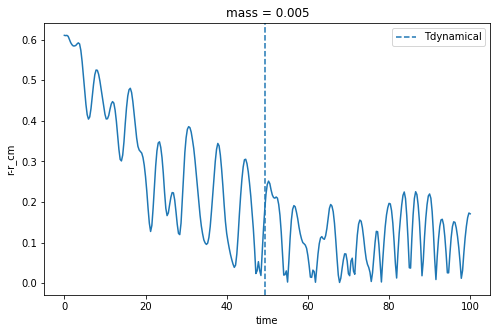

In [28]:
plt.figure(figsize=(8, 5))
plt.title('mass = '+str(mp))
plt.plot(t_s,np.abs(r[-1,:]-r_cm))
plt.axvline(T_dynamical, label='Tdynamical', linestyle='--')
plt.xlabel('time')
plt.ylabel('r-r_cm')
plt.legend()
plt.savefig('distanceM'+str(mp)+'.png', bbox_inches='tight')

![](distanceM0.1.png)

![](distanceM0.01.png)

![](distanceM0.005.png) 

#### Perturber velocity modulus with time

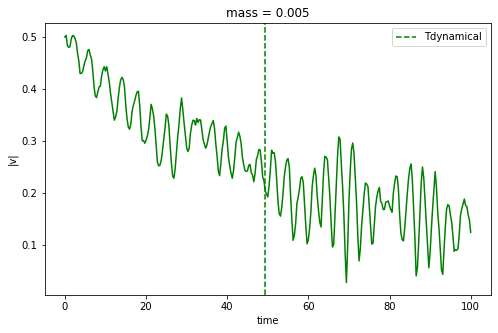

In [29]:
plt.figure(figsize=(8, 5))

v = np.sqrt(vx_s**2 + vy_s**2 + vz_s**2)

plt.axvline(T_dynamical, label='Tdynamical', linestyle='--', color='green')
plt.plot(t_s, v[-1,:], color='green')
plt.title('mass = '+str(mp))

plt.xlabel('time')
plt.ylabel('|v|')
plt.legend()

plt.savefig('velocityM'+str(mp)+'.png', bbox_inches='tight')

![](velocityM0.1.png)

![](velocityM0.01.png)

![](velocityM0.005.png) 

#### Lagrangian radii

In [30]:
# notice: radius_array must be of shape [N_particles, N_time_output]
def Lagrangian_Radius(radius_array, quantile):
    
    L_radii = []
    
    # cycle over N_time_output
    for i in range(len(radius_array[0])):
        
        radii_sorted = np.sort(radius_array[:,i])
        mask = radii_sorted < np.quantile(radii_sorted, quantile)
        L_radii.append(np.max(radii_sorted[mask]))
        
    return np.array(L_radii)

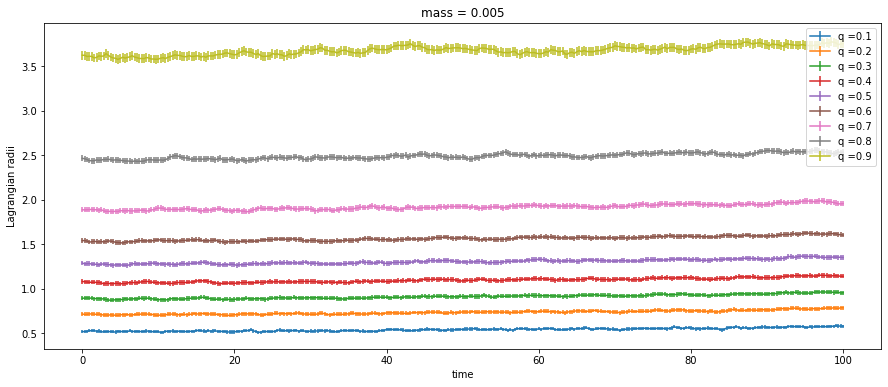

In [31]:
plt.figure(figsize=(15, 6))

quantiles = np.linspace(0.1, 0.9, 9)

std = []

for q in quantiles:
    
    L = Lagrangian_Radius(r, round(q,1))
    std.append(np.var(L)**0.5)
    
    plt.errorbar(t_s, L, yerr=std[-1], xerr=None, label='q ='+str(round(q,1))) 
    #plt.plot(t_s, L, label='q ='+str(round(q,1)))
    
    
#plt.axhline(b, label='b', color='black')
plt.title('mass = '+str(mp))
plt.ylabel('Lagrangian radii')
plt.xlabel('time')
plt.legend()

plt.savefig('LradiiM'+str(mp)+'.png', bbox_inches='tight')

![](LradiiM0.1.png)

![](LradiiM0.01.png)

![](LradiiM0.005.png) 

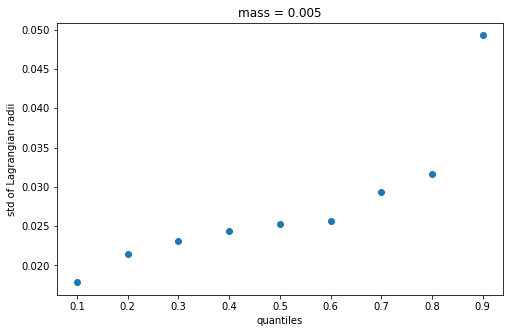

In [32]:
plt.figure(figsize=(8,5))

plt.scatter(quantiles, std)
#plt.axvspan(0.35, 1., alpha=0.2, color='blue', label='L_radius > b')

#plt.semilogy()
plt.title('mass = '+str(mp))
plt.ylabel('std of Lagrangian radii')
plt.xlabel('quantiles')
#plt.legend()

plt.savefig('Lradii_std_M'+str(mp)+'.png', bbox_inches='tight')

![](Lradii_std_M0.1.png)

![](Lradii_std_M0.01.png)

![](Lradii_std_M0.005.png) 

#### Density profile

In [143]:
r_t   = np.transpose(r)
sampl = 1000
alpha = b/100
p_error = []
X     = np.linspace(b*0.01, 3 * b, sampl)
rho_t = []
for i in range(len(r_t)):
    rho = []
    tmp_err = []
    for x in X:
        dr      = alpha * x 
        r_min   = (x - dr/2)
        r_max   = (x + dr/2) 
        V_shell = 4 * np.pi * dr * x**2 #Calcolo i volume della shell
        mask    = (r_t[i] > r_min) * (r_t[i] < r_max) # prendo i raggi compresi tra r_min e r_max
        n       = len(r_t[i][mask])
        rho.append(n * m / V_shell) #len(r_t[i][mask] è il numero di particelle dentro la shell
        tmp_err.append(np.sqrt(n)*m/V_shell)
    rho_t.append(rho)
    p_error.append(tmp_err)

In [144]:
p_error = np.array(p_error)
tmp_err = np.array(tmp_err)
rho_t = np.array(rho_t) # densità a diversi tempi
rho = np.array(rho) #denisità a tempo = T_sim
rho_th = 3* M /(4*np.pi*b**3) * 1/(1+(X**2/b**2))**(5/2)
rho_c = 3* M /(4*np.pi*b**3) #densità centrale

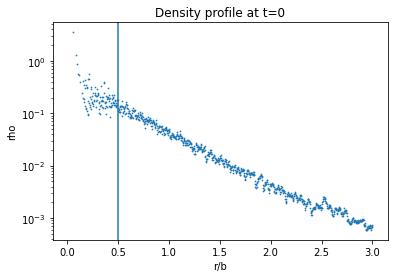

In [145]:
plt.scatter(X/b, rho_t[0], s=0.5)

#plt.scatter(X, rho_plummer, s=0.5, label='unperturbed')
plt.semilogy()

plt.xlabel('r/b')
plt.ylabel('rho')
plt.title('Density profile at t=0')
plt.semilogy()
plt.axvline(xp)

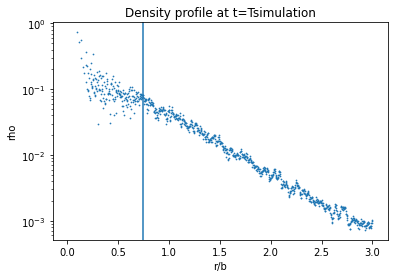

In [146]:
plt.scatter(X/b, rho_t[-1], s=0.5)
plt.xlabel('r/b')
#plt.scatter(X, rho_plummer, s=0.5, label='unperturbed')
plt.ylabel('rho')

plt.title('Density profile at t=Tsimulation')
plt.semilogy()
plt.axvline(r[-1,-1], )

#### fluctuation of density in time

/var/folders/l6/xx2lbds11l37fqdhf3bcglx80000gn/T/ipykernel_8226/2401275692.py:2: RuntimeWarning: invalid value encountered in true_divide
  std_norm = std/ np.mean(rho_t, axis=0)


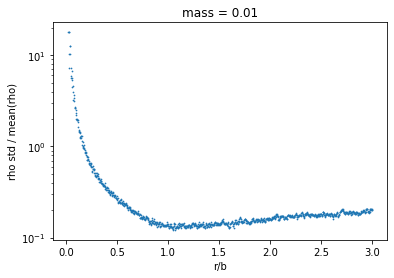

In [147]:
std = (np.var(rho_t, axis = 0))**0.5
std_norm = std/ np.mean(rho_t, axis=0)
plt.scatter(X/b, std_norm, s=0.5)
plt.xlabel('r/b')
plt.ylabel('rho std / mean(rho)')
plt.title('mass = '+str(mp))

plt.semilogy()

plt.savefig('rho_std_M'+str(mp)+'.png', bbox_inches='tight')